In [1]:
!pip install pyproj

In [2]:
!pip install geopandas

In [3]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.7 MB/s eta 0:00:00


In [4]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890028 sha256=d69102b54a7e21a5b44af0777569f2acfd37eb1b35960b26661c1b9786482be6
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely


In [5]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [6]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [7]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [8]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


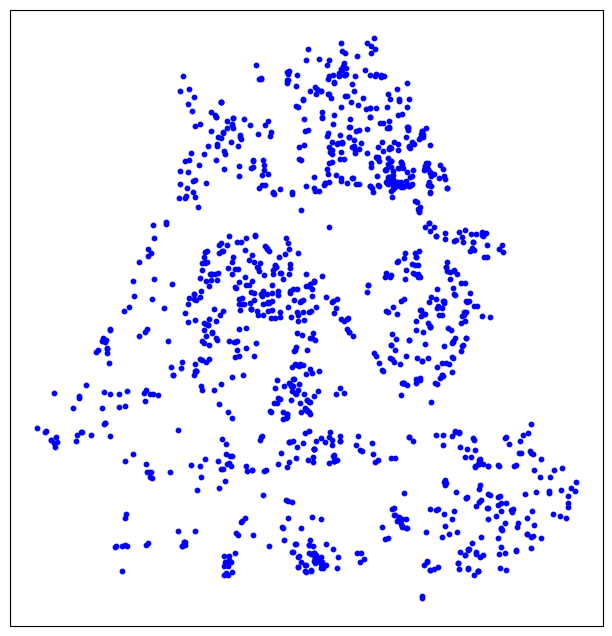

In [9]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [10]:
#Se carga la cartografía de Floridablanca
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

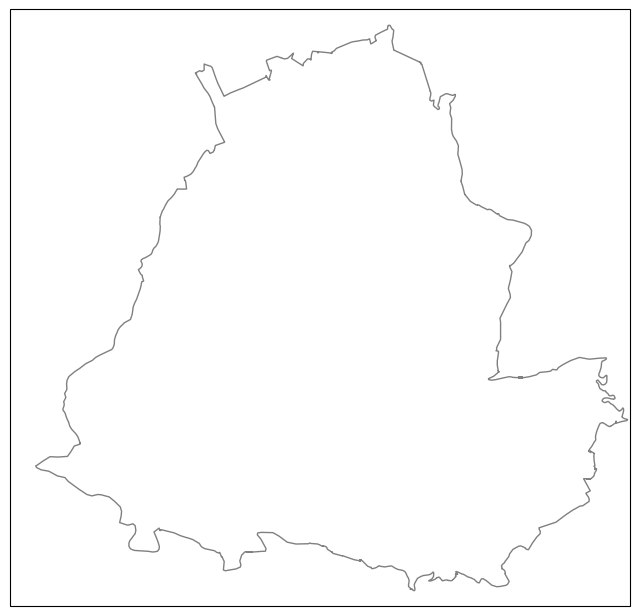

In [11]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

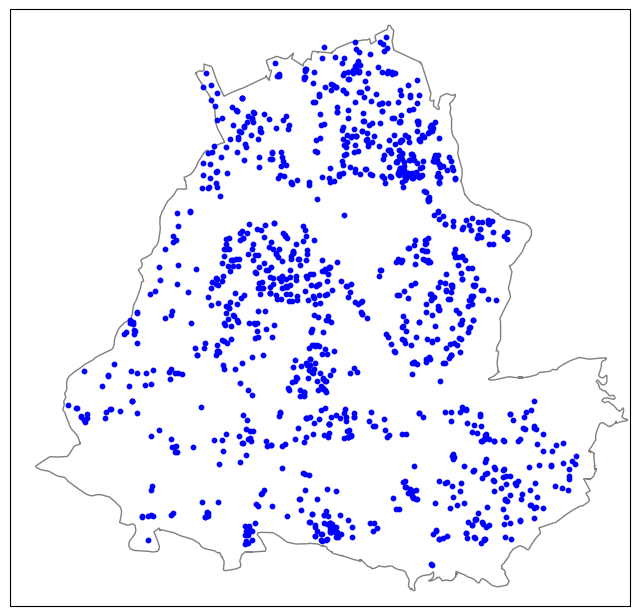

In [12]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [14]:
# leer archivo
data = gpd.read_file("68276_urbano.shp")
data_copy = data

#Obtener el area
crs = pyproj.CRS(proj='utm', zone=18, elips='WGS84')
data_copy = data_copy.to_crs(crs)
data['poly_area'] = data_copy['geometry'].area
area = float(data['poly_area'])
print("El area es de ", area, " metros cuadrados")

El area es de  14180920.862356503  metros cuadrados


In [15]:
#Definir la función de calcular la distancia
def distancia(x1,y1,x2,y2):
  d=math.sqrt(((x2-x1)**2)+((y2-y1)**2))
  return d

#Definir la función k
def funcionK (datos, a, distMin):
  x = datos["x"].values.tolist()
  y = datos["y"].values.tolist()
  largo=len(df)
  parejas=0
  for i in range(0,largo):
    for j in range(i+1, largo):
      x1=x[i]
      y1=y[i]
      x2=x[j]
      y2=y[j]
      d=distancia(x1,y1,x2,y2)

      if (d<=distMin):
        parejas=parejas+1
  k=(a/(largo**2))*parejas
  return k

In [16]:
#Calcular la función k en los datos existentes

k=funcionK(df, area, 100)
print("El valor de la función K para los datos es",k)

El valor de la función K para los datos es 35420.158673535436


In [51]:
#Definir el polígono a usar y la cantidad de puntos a generar

import geopandas as gpd
from shapely.geometry import Point
import random

poligono = gpd.read_file('68276_urbano.shp')
cantidad_puntos=1262

In [53]:
#definir función degenerar números aleatorios
def generateRandomPoints(cantidad_puntos, poligono):
  listaX = []
  listaY = []
  tempDF = pd.DataFrame()

  while len(listaY) < cantidad_puntos:
      # Genera un punto aleatorio dentro de los límites del polígono
      x = random.uniform(poligono.bounds['minx'], poligono.bounds['maxx'])
      y = random.uniform(poligono.bounds['miny'], poligono.bounds['maxy'])
      punto = Point(x, y)

      # Comprueba si el punto generado está dentro del polígono
      if punto.within(poligono.geometry.iloc[0]):
          listaX.append(x)
          listaY.append(y)
  tempDF['longitud'] =listaX
  tempDF['latitud'] =listaY
  P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)
  tempDF['x'], tempDF['y'] = P(tempDF['longitud'], tempDF['latitud'])
  return tempDF

In [54]:
#función
pointsDF=generateRandomPoints(cantidad_puntos,poligono)
pointsDF

,longitud,latitud,x,y
0,0 -73.085403 dtype: float64,0 7.057482 dtype: float64,711481.659929,780537.538357
1,0 -73.099737 dtype: float64,0 7.071441 dtype: float64,709891.472255,782075.030850
2,0 -73.092798 dtype: float64,0 7.058441 dtype: float64,710664.053181,780640.257502
3,0 -73.110448 dtype: float64,0 7.075517 dtype: float64,708706.203460,782521.034156
4,0 -73.108023 dtype: float64,0 7.061508 dtype: float64,708980.397488,780972.652633
...,...,...,...,...
1257,0 -73.084478 dtype: float64,0 7.063377 dtype: float64,711581.146685,781189.965444
1258,0 -73.093394 dtype: float64,0 7.07201 dtype: float64,710592.097973,782140.831884
1259,0 -73.095821 dtype: float64,0 7.085805 dtype: float64,710317.637223,783665.509258
1260,0 -73.117992 dtype: float64,0 7.064375 dtype: float64,707877.640913,781285.290063


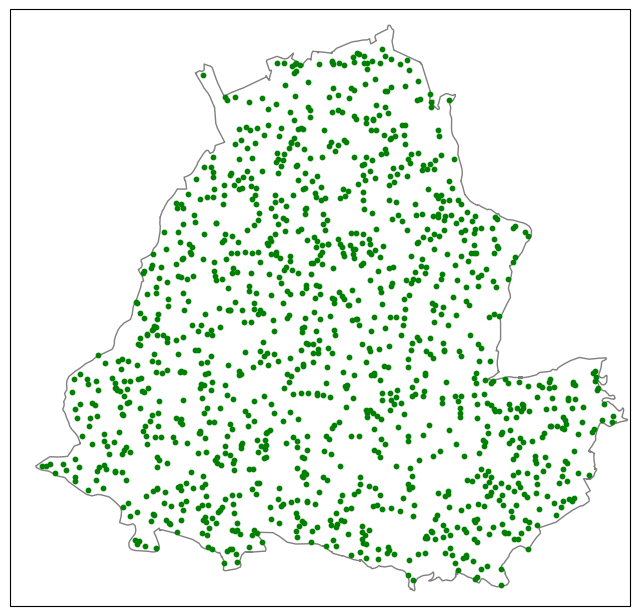

In [55]:
#Mostrar puntos en el mapa

subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(pointsDF['longitud'], pointsDF['latitud'], zorder=10, c='green', s=10)

plt.show()

In [56]:
#Obtener valor de función k
k=funcionK(pointsDF, area, 100)
print("El valor de la función K para los datos es",k)

El valor de la función K para los datos es 15421.74832140859


In [29]:
distA=20
distB=200
salto=20
numGrupos=99

#Generar cabecera de la tabla
k_table_head=["Grupo"]
for i in range(distA, distB+1, salto):
    k_table_head.append(i)

#Generar funcion k para datos reales
lista_k_real=[]
for i in range(distA, distB+1, salto):
    k=funcionK(df, area, i)
    lista_k_real.append(k)
tabla_k=[lista_k_real]

#Generar funcion k para datos aleatorios
for i in range (numGrupos):
  lista_k=[]
  randomPointsDF=generateRandomPoints(cantidad_puntos,poligono)
  for j in range(distA, distB+1, salto):
    k=funcionK(randomPointsDF, area, j)
    lista_k.append(k)
  tabla_k.append(lista_k)


from tabulate import tabulate

def tabla_con_indice(tabla, head):
  tabla_nueva=[]

  for i in range(len(tabla)):
    lista_nueva=[i]
    for j in range(len(tabla[i])):
      lista_nueva.append(tabla[i][j])
    tabla_nueva.append(lista_nueva)
  print (tabulate(tabla_nueva, headers=head))

In [30]:
from tabulate import tabulate

def tabla_con_indice(tabla, head):
  tabla_nueva=[]

  for i in range(len(tabla)):
    lista_nueva=[i]
    for j in range(len(tabla[i])):
      lista_nueva.append(tabla[i][j])
    tabla_nueva.append(lista_nueva)
  print (tabulate(tabla_nueva, headers=head))

In [31]:
tabla_con_indice(tabla_k, k_table_head)

  Grupo        20       40        60        80      100      120      140      160      180       200
-------  --------  -------  --------  --------  -------  -------  -------  -------  -------  --------
      0  3632.84   8610.18  16160.8   25376.4   35420.2  47155.6  60956.9  76351.9  91809.3  109128
      1   578.761  2528.74   5814.32  10346.5   15546.4  22144.3  29970.9  38812.6  48811.8   59799.3
      2   614.377  2502.03   5297.89   9367.02  14709.4  21236.1  29196.3  37708.5  47360.4   58161
      3   685.609  2510.93   5315.7    9527.29  15047.8  21681.3  29401    38322.9  48188.5   59202.8
      4   578.761  2475.32   5458.16   9936.88  15314.9  21743.6  29783.9  38447.5  48464.5   59977.4
      5   649.993  2430.8    5271.17   9838.93  15323.8  21903.9  29668.2  38857.1  48954.3   59656.9
      6   676.705  2831.48   6134.86  10542.3   15795.7  22420.3  30211.3  39409.2  49283.7   60458.2
      7   712.321  2332.85   5547.2    9723.18  14682.7  21583.3  28537.4  37512.6  47

In [36]:
#Obtener una de las distancias usadas
lista_distancias=[]
for i in range(distA, distB+1, salto):
    lista_distancias.append(i)

#Volver las columnas en filas
tabla_k_traspuesta=list(zip(*tabla_k))

def tabla_traspuesta(tabla, distancias):
  tabla_nueva=[]
  head=['Distancia']

  for i in range(len(tabla)):

    lista_nueva=[distancias[i]]
    for j in range(len(tabla[i])):
      head.append(j)
      lista_nueva.append(tabla[i][j])
    tabla_nueva.append(lista_nueva)
  print (tabulate(tabla_nueva, headers=head))

In [37]:
tabla_traspuesta(tabla_k_traspuesta, lista_distancias)

  Distancia          0          1          2          3          4          5          6          7          8          9         10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67         68         69         70         71         72         73         74         75         76         77         78         79         80         81         82         83         84         85         86         87         88         8

In [38]:
#Ordenar los valores para cada distancia de menor a mayor

tabla_k_ordenada=[]
for i in range(len(tabla_k_traspuesta)):
  tabla_k_ordenada.append(np.sort(tabla_k_traspuesta[i]))

tabla_traspuesta(tabla_k_ordenada, lista_distancias)

  Distancia          0          1          2          3          4          5          6          7          8          9         10         11         12         13         14         15         16         17         18         19         20         21         22         23         24         25         26         27         28         29         30         31         32         33         34         35         36         37         38         39         40         41         42         43         44         45         46         47         48         49         50         51         52         53         54         55         56         57         58         59         60         61         62         63         64         65         66         67         68         69         70         71         72         73         74         75         76         77         78         79         80         81         82         83         84         85         86         87         88         8

In [39]:
lista_percentiles_2_5=[]
for i in range(len(tabla_k_ordenada)):
  lista_percentiles_2_5.append(np.percentile(tabla_k_ordenada[i], 2.5))
lista_percentiles_2_5

[480.3714329907583,
 2194.1710912835515,
 5096.8789162138055,
 9295.3430485765,
 14489.720893265725,
 21017.25189466563,
 28497.066950900782,
 37231.90246089029,
 46909.00501251552,
 57737.39628120664]

In [40]:
lista_percentiles_97_5=[]
for i in range(len(tabla_k_ordenada)):
  lista_percentiles_97_5.append(np.percentile(tabla_k_ordenada[i], 97.5))
lista_percentiles_97_5

[774.6490207635954,
 2818.787514347531,
 6030.687146703254,
 10351.136239806883,
 15800.391420350796,
 22514.46146755527,
 30492.45598024701,
 39400.697118735035,
 49489.38761271425,
 60816.62613874193]

In [41]:
percentilesDF = pd.DataFrame()
percentilesDF['distancia'] =lista_distancias
percentilesDF['percentil_2.5'] =lista_percentiles_2_5
percentilesDF['percentil_97.5'] =lista_percentiles_97_5
percentilesDF['valor_real'] =lista_k_real
percentilesDF

,distancia,percentil_2.5,percentil_97.5,valor_real
0,20,480.371433,774.649021,3632.836787
1,40,2194.171091,2818.787514,8610.179346
2,60,5096.878916,6030.687147,16160.781295
3,80,9295.343049,10351.136240,25376.433439
4,100,14489.720893,15800.391420,35420.158674
5,120,21017.251895,22514.461468,47155.646138
6,140,28497.066951,30492.455980,60956.864324
7,160,37231.902461,39400.697119,76351.900610
8,180,46909.005013,49489.387613,91809.264978
9,200,57737.396281,60816.626139,109127.567799


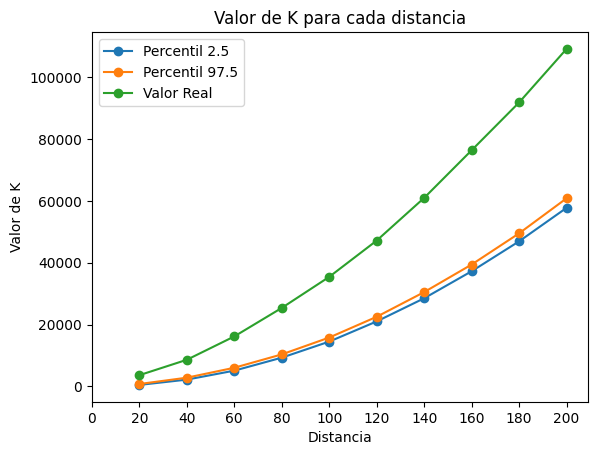

In [42]:
# Configurar la figura y los ejes
fig, ax = plt.subplots()

# Graficar las columnas 'percentil_2.5', 'percentil_97.5' y 'valor_real' en diferentes líneas
ax.plot(percentilesDF['distancia'], percentilesDF['percentil_2.5'], label='Percentil 2.5', marker='o')
ax.plot(percentilesDF['distancia'], percentilesDF['percentil_97.5'], label='Percentil 97.5', marker='o')
ax.plot(percentilesDF['distancia'], percentilesDF['valor_real'], label='Valor Real', marker='o')

# Etiquetas de los ejes y título
ax.set_xlabel('Distancia')
ax.set_ylabel('Valor de K')
ax.set_title('Valor de K para cada distancia')

# Ajustar el eje x para mostrar números de 20 en 20
xticks = np.arange(0, percentilesDF['distancia'].max() + salto, salto)
ax.set_xticks(xticks)

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()